# Dağılım Grafikleri 

## Barplot

**Veri Seti Hikayesi**

* Price: dolar cinsinden fiyat(326-18,823)
* Carat: ağırlık(0.2-5,01)
* Cut: kalite(Fair, Good, Very Good, Premium, Ideal)
* Color: renk(from J (worst) to D(best))
* Clarity: temizliği, berraklığı (I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best))
* X: length in mm (0-10.74)
* Y: width in mm (0-58.9)
* Z: depth in mm (0-31.8)
* Depth: toplam derinlik yüzdesi = z/mean(x,y) = 2*z/(x+y)(43-79)
* Table: elmasın en geniş noktasına göre genişliği (43-95)

In [3]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Veri Setine Hızlı Bakış**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [10]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [12]:
#Ordinal(sıralı) tanımlama
from pandas.api.types import CategoricalDtype

In [13]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [18]:
df.cut.astype(CategoricalDtype(ordered=True))
#Bu şekilde yaparsak kendisi rastgele yanlış sıralar, dolayısıyla sırayı belirtmek durumundayız

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [23]:
cut_categories=["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_categories,ordered=True))

In [24]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [25]:
#Barplot

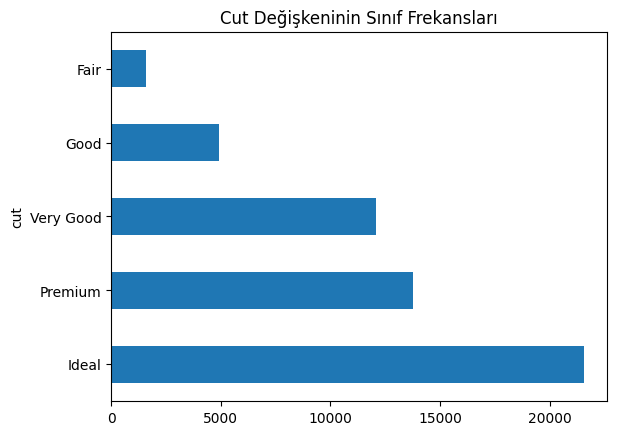

In [32]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları"); #Pandas ile

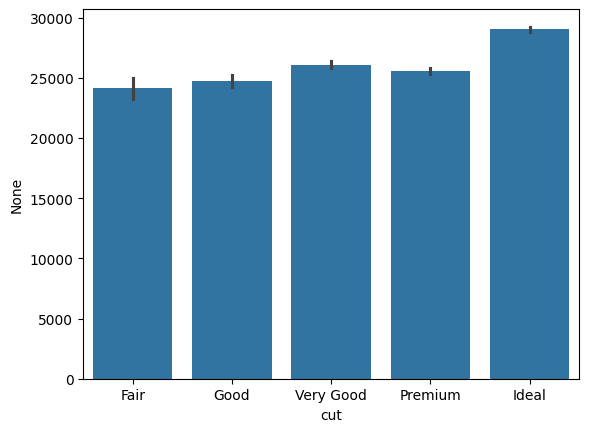

In [36]:
sns.barplot(x="cut",y=df.cut.index,data=df);

**Çaprazlamalar**

In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


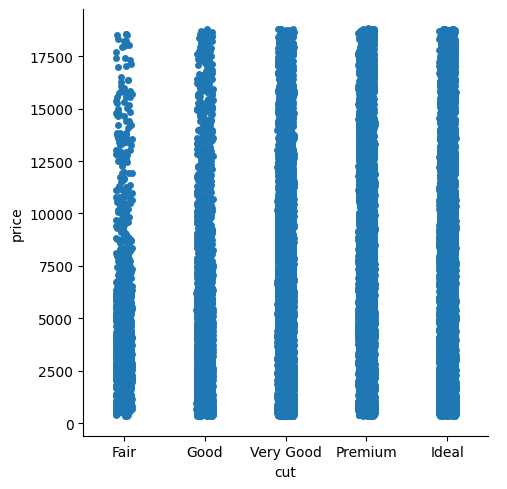

In [62]:
sns.catplot(x="cut",y="price",data=df); #Fiyatların elmas kategorisine göre dağılımı

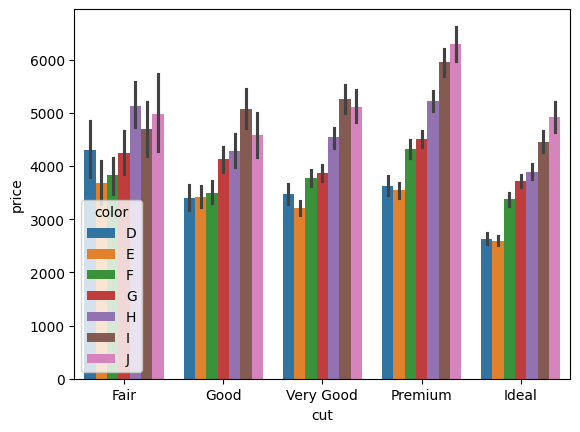

In [60]:
sns.barplot(x="cut", y="price", hue="color", data=df); #3. bir değişken ekleyerek fiyat ortalamalarına dair bilgi almış olduk.

In [61]:
df.groupby(["cut","color"])["price"].mean() #Bu şekilde grafiğin doğruluğunu kontrol ediyoruz.

C:\Users\Onur Fidan\AppData\Local\Temp\ipykernel_7724\3766637999.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].mean() #Bu şekilde grafiğin doğruluğunu kontrol ediyoruz.


cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337